In [178]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplhep as hep
import datetime
hep.style.use('CMS')

In [179]:
con = sqlite3.connect('/home/daq/ETROC2/ETROC-History/CERN_Aug_2024_CC_CTS/ti1080_sensor_data.sqlite')
ti_hdc1080_df = pd.read_sql_query("SELECT * from ti_hdc1080", con)
ti_hdc1080_df['timestamp'] = pd.to_datetime(ti_hdc1080_df['timestamp'])

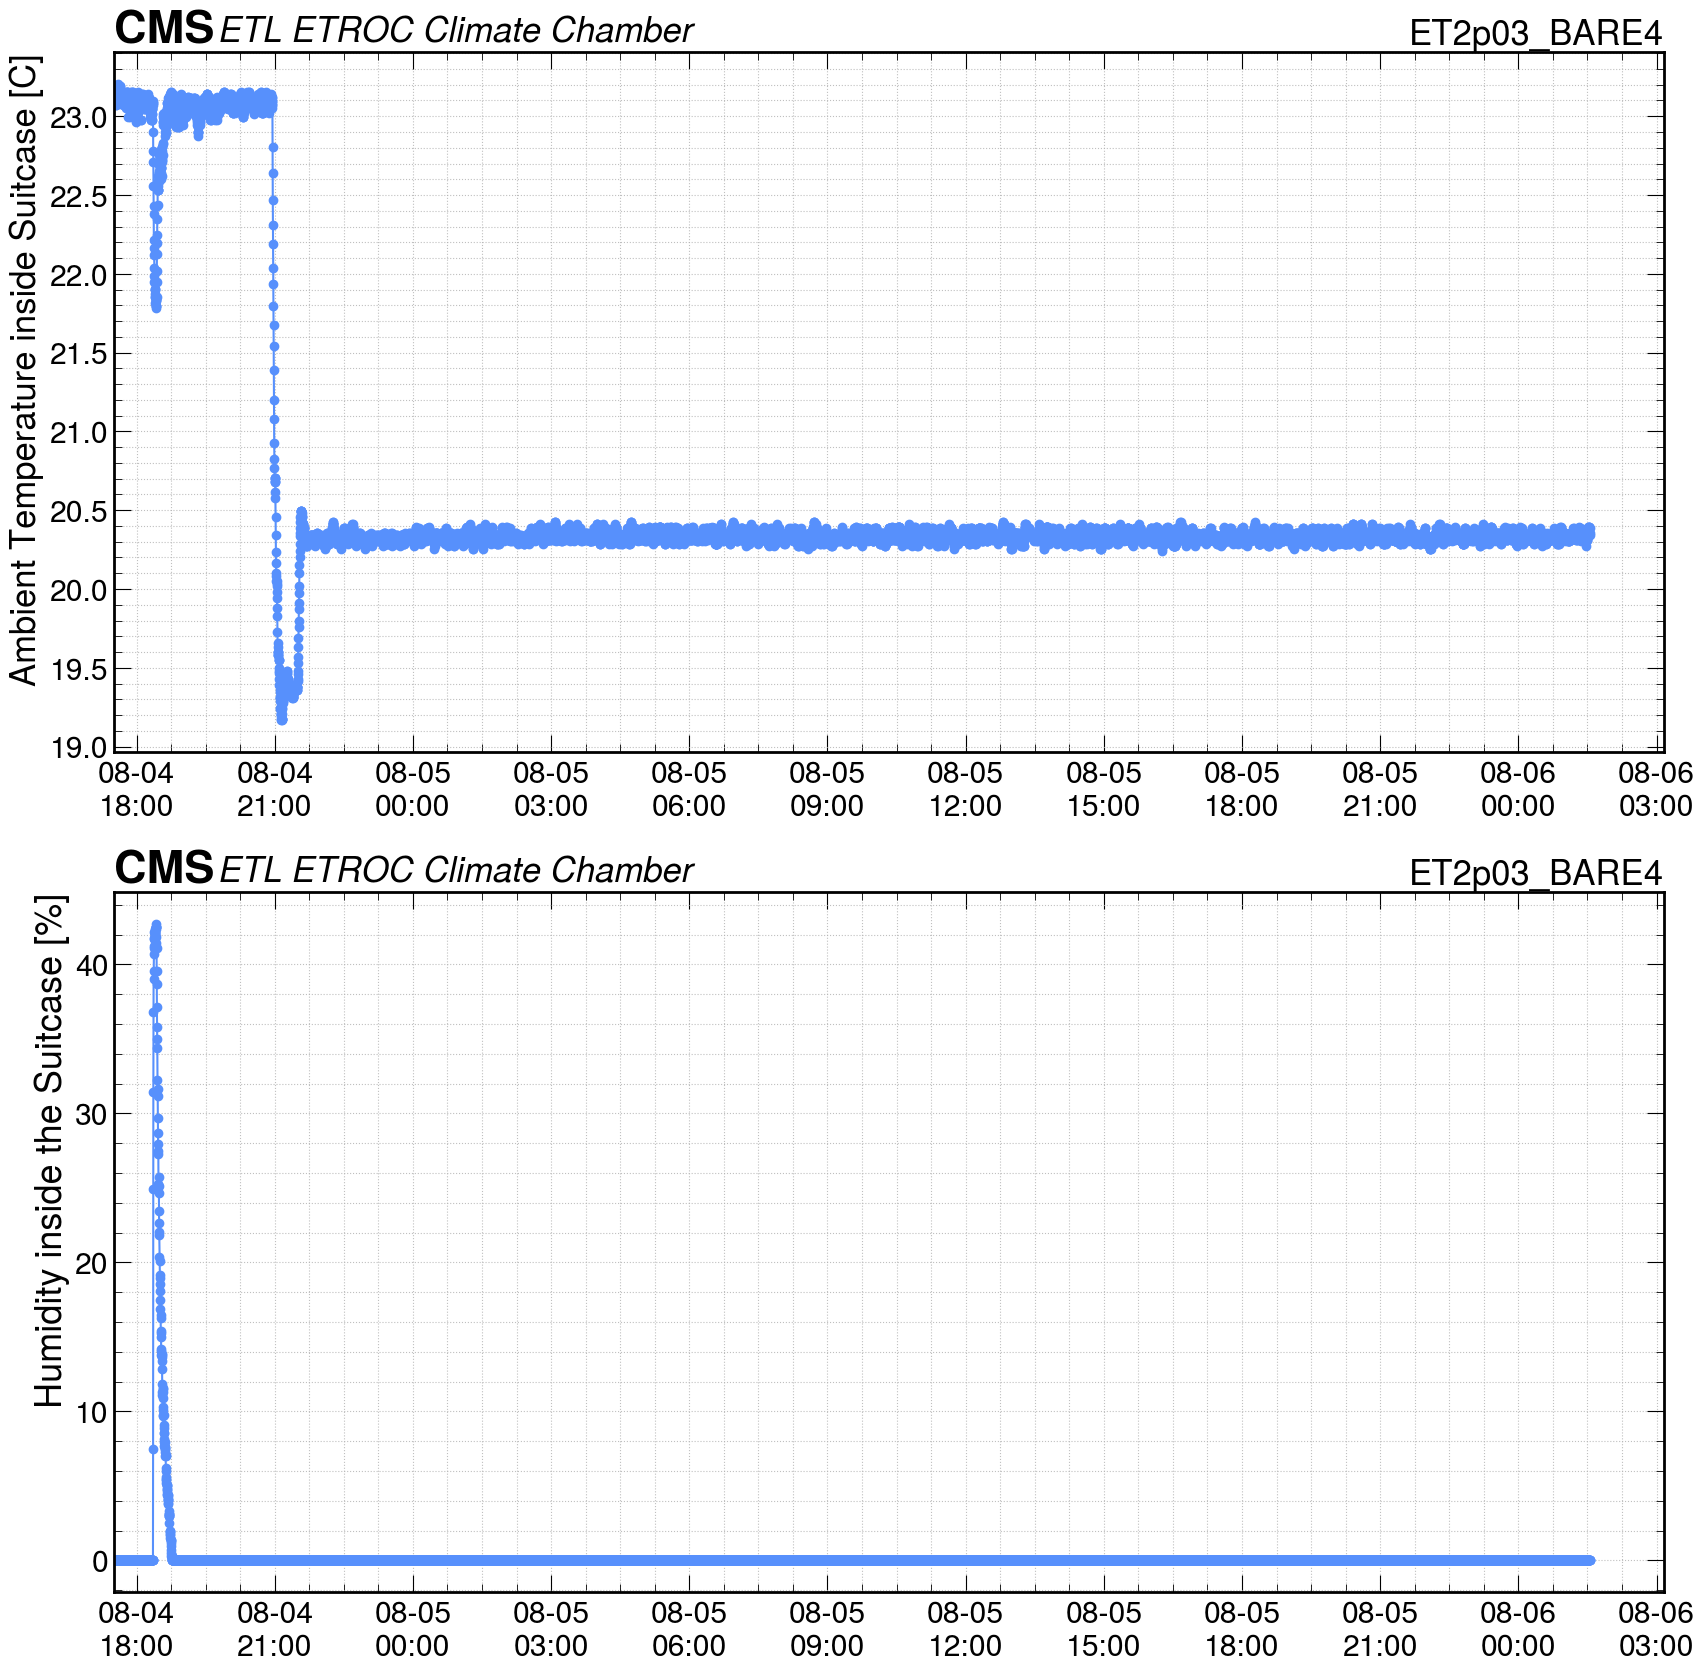

In [180]:
date_form = mdates.DateFormatter("%m-%d\n%H:%M")
left_cut = datetime.datetime(2024, 8, 4, 17, 30)
right_cut = None
title_text = "ET2p03_BARE4"
fig, ax = plt.subplots(nrows=2,ncols=1, figsize=(20, 20))

hep.cms.text(loc=0, ax=ax[0], text="ETL ETROC Climate Chamber", fontsize=25)
ax[0].plot(ti_hdc1080_df['timestamp'], ti_hdc1080_df['temperature'],"o-")
ax[0].xaxis.set_major_formatter(date_form)
ax[0].set_title(title_text, loc='right', fontsize=25)
ax[0].set_ylabel('Ambient Temperature inside Suitcase [C]', fontsize=25)
ax[0].set_xlim(left=left_cut, right=right_cut)
# ax[0].set_ylim(24, 27)
ax[0].grid(which="both")

hep.cms.text(loc=0, ax=ax[1], text="ETL ETROC Climate Chamber", fontsize=25)
ax[1].plot(ti_hdc1080_df['timestamp'], ti_hdc1080_df['humidity'], "o-")
ax[1].xaxis.set_major_formatter(date_form)
ax[1].set_title(title_text, loc='right', fontsize=25)
ax[1].set_ylabel('Humidity inside the Suitcase [%]')
ax[1].set_xlim(left=left_cut, right=right_cut)
# ax[1].set_ylim(-2,15)
ax[1].grid(which="both")